파이썬 머신러닝 완벽가이드  ch4. 3 ~ 6 pg. 210~244

---
#**04. 분류**
04-03. 앙상블 학습
- 앙상블 학습 개요
- 보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)
- 보팅 분류기(Voting Classifier)

04-04. 랜덤 포레스트
- 랜덤 포레스트의 개요
- 랜덤 포레스트 하이퍼 파라미터 및 튜닝

04-05. GBM(Gradient Boosting Machine)
- GBM의 개요
- GBM 하이퍼 파라미터 소개

04-06. XGBoost(eXtra Gradient Boost)
- XGBoost 개요
- XGBoost 설치하기
- 파이썬 래퍼 XGBoost 하이퍼 파라미터
- 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측
- 사이킷런 래퍼 XGBoost의 개요 및 적용
---

###**04-03. 앙상블 학습**
**앙상블 학습(Ensemble Learning)을 통한 분류(Classification)란**:
- 여러개의 분류기(classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법
   - 이미지, 영상, 음성과 같은 비정형 데이터 분류엔 딥러닝이, 대부분의 정형 데이터 분류엔 앙상블이 뛰어난 성능을 보임.

**앙상블 학습의 유형**
   - 보팅(Voting): 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식. 일반적으로 보팅은 서로 다른 알고리즘을 가진 분류기를 결합함.
   - 배깅(Bagging): 각각의 분류기가 모두 같은 유형의 알고리즘(단일 ML 알고리즘)이고, 개별 분류기가 부트스트래핑 방식으로 샘플링된 데이터 세트에 대해서 학습을 통해 개별적인 예측을 수행한 결과를 보팅을 통해서 최종 예측 결과를 선정하는 방식. 여기서 부트스트래핑(Bootstrapping) 분할 방식이란 개별 분류기에게 데이터를 샘플링해서 추출하는 방식을 의미. 교차검증은 데이터 세트 간 중첩을 허용하지 않는 반면 배깅방식은 중첩을 허용함. 대표적으로, 랜덤 포레스트 알고리즘이 있음.
   - 부스팅(Boosting): 여러개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에게는 가중치(weight)를 부여하면서 학습과 예측을 진행하는 방식. 대표적으로, 그래디언트 부스트, XGBoost(eXtra Gradient Boost), LightGBM(Light Gradient Boost)가 있음.
   - 스태킹(Stacking): 여러가지 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어서 다른 모델(메타 모델)로 재학습시켜 결과를 예측하는 방법
  







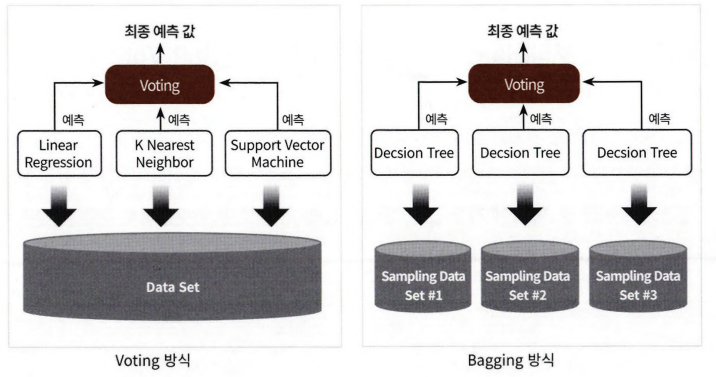

**보팅의 유형**

   일반적으로 하드 보팅보단 소프트 보팅이 예측 성능이 더 좋아서 소프트 보팅이 보팅 방법으로 적용됨.
   - 하드 보팅(Hard Voting): 다수의 분류기들 간 다수결로 최종 class 결정.
   - 소프트 보팅(Soft Voting): 다수의 분류기들의 class 확률을 평균하여 더 높은 class로 결정.

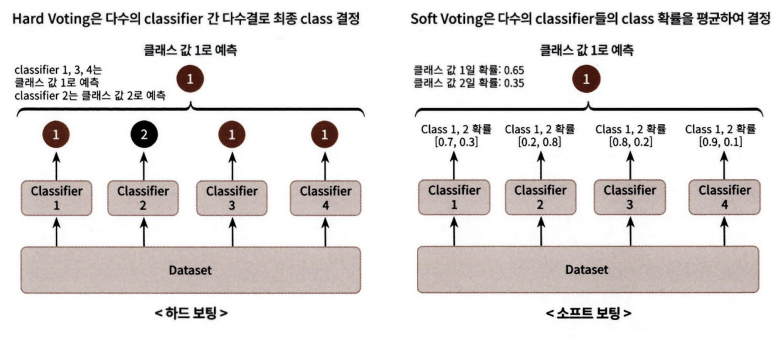

<하드 보팅>: 분류기 1, 3, 4번이 1로 레이블 값을 예측하고 분류기 2번이 2로 레이블 값을 예측하므로 다수결 원칙에 따라 최종 예측은 레이블값 1.

<소프트 보팅>: 레이블값 1의 평균 예측 확률은 (0.7 + 0.2 + 0.8 + 0.9) / 4 = 0.65, 레이블값 2의 평균 예측 확률은 (0.3 + 0.8 + 0.2 + 0.1) / 4 = 0.35로 레이블값 1의 확률이 레이블값 2의 확률보다 크므로 레이블값 1로 최종보팅.

**보팅 분류기 (Voting Classifier)**
   - VotingClassifier(estimators=[ ( ), ( ) ], voting='soft')


In [ ]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
# 개별 모델은 로지스틱 회귀와 KNN
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  pred = classifier.predict(X_test)
  class_name = classifier.__class__.__name__
  print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))


Voting 분류기 정확도 : 0.9561
LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


보팅 분류기가 기반 분류기보다 정확도가 조금 높게 나타남. 사실 무조건 예측 성능이 향상되는 것은 아니고, 데이터의 특성과 분포에 따라 오히려 기반 분류기 성능이 나을 수도 있음. ML 모델의 성능은 어떻게 높은 유연성을 가지고 다양한 변수와 예측이 어려운 규칙으로 구성된 현실에 대처할 수 있는가가 중요한 모델의 평가요소임.

###**04-04. 랜덤 포레스트**
**랜덤 포레스트란?**
   - 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 하는 방식.
   - 배깅(bagging)의 대표적인 알고리즘
   - 앙상블 알고리즘 중 비교적 빠른 수행 속도를 가짐.
   - 기반 알고리즘은 결정 트리로, 결정 트리의 쉽고 직관적인 장점을 가짐.
   - 랜덤포레스트의 서브세트(Subset)데이터는 여러개의 데이터 세트를 중첩되게 분리하는 방법인 부트스트래핑(Bootstrapping) 분할 방식으로 데이터가 임의로 만들어짐. 이렇게 만들어진 데이터 세트를 개별 트리가 학습하는 것.

아래는 원본 데이터 건수가 10개인 학습 데이터 세트에 랜덤 포레스트를 3개의 결정 트리 기반으로 학습하기 위해 n_estimators=3으로 하이퍼 파라미터를 부여하였을 때 만들어지는 데이터 서브세트들이다. 부트스트래핑 샘플링 방식이 어떻게 이루어지는지를 설명한다.

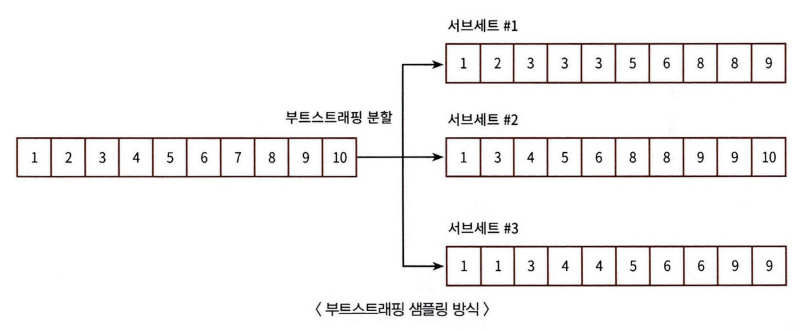

**랜덤 포레스트 하이퍼 파라미터 및 튜닝**

트리 기반의 앙상블 알고리즘은 다른 ML 알고리즘에 비해 하이퍼 파라미터가 너무 많고, 그 때문에 튜닝을 위한 시간이 많이 소모된다는 단점이 있음. 그나마 랜덤포레스트는 결정 트리에서 사용되는 하이퍼 파라미터와 같은 파라미터가 대부분으로, 적은 편에 속함.
   - n_estimators: 결정 트리의 개수를 지정. 디폴트는 10개. 많이 설정할수록 좋은 성능을 기대할 수 있지만 계속 증가시킨다고 무조건 향상되는 것은 아니고, 학습 수행 시간이 늘어날 것도 감안해야함.  
   - max_features: 디폴트는 결정트리에선 'None'이었던 것관 다르게 'sqrt'임. 전체 피처가 16개라면 4개의 피처가 참조되는 것.
   - max_depth, min_samples_leaf, min_samples_split: 결정트리에서처럼 과적합을 개선하기 위해 사용됨.


In [ ]:
# 중복된 피처명에 대해서 원본 피처명에 _1, _2를 추가로 부여해 새로운 피처명을 가지는 DataFrame을 반환하는 함수 생성
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1)

  new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
  return new_feature_name_df

def get_human_dataset( ):
  # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
  feature_name_df = pd.read_csv('/content/drive/MyDrive/ESAA_2024-2/DataSets/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

  # 중복된 피처명을 수정하는 get_new_feature_name_df()을 이용, 신규 피처명 DataFrame 생성.
  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 반환.
  feature_name = new_feature_name_df.iloc[:,1].values.tolist()

  # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
  X_train = pd.read_csv('/content/drive/MyDrive/ESAA_2024-2/DataSets/X_train.txt', sep='\s+', names=feature_name)
  X_test = pd.read_csv('/content/drive/MyDrive/ESAA_2024-2/DataSets/X_test.txt', sep='\s+', names=feature_name)

  # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
  y_train = pd.read_csv('/content/drive/MyDrive/ESAA_2024-2/DataSets/y_train.txt', sep='\s+', header=None, names=['action'])
  y_test = pd.read_csv('/content/drive/MyDrive/ESAA_2024-2/DataSets/y_test.txt', sep='\s+', header=None, names=['action'])

  # 로드된 학습/테스트용 DataFrame을 모두 반환
  return X_train, X_test, y_train, y_test

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정트리에서 사용한 get_human_dataset()를 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset( )

# 랜덤포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9196


In [ ]:
# GridSearchCV를 이용해서 랜덤포레스트의 하이퍼 파라미터 튜닝
# RandomForestClassifier 생성자와 GridSearchCV 생성 시, n_jobs=-1 파라미터를 추가하면 모든 CPU 코어를 이용해 학습 가능.
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [8, 16, 24],
    'min_samples_leaf' : [1, 6, 12],
    'min_samples_split' : [2, 8, 16]
    }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [8, 16, 24],
                         'min_samples_leaf': [1, 6, 12],
                         'min_samples_split': [2, 8, 16]})

In [ ]:
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2}
최고 예측 정확도:0.9165


In [ ]:
# 추출된 최적의 하이퍼 파라미터로 다시 RandomForestClassifier 학습시킨 후 별도의 테스트 데이터 세트에서 예측 성능 측정.
rf_clf1 = RandomForestClassifier(n_estimators=100, min_samples_leaf=6, max_depth=16, min_samples_split=2, random_state=0)

rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도:{0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도:0.9260


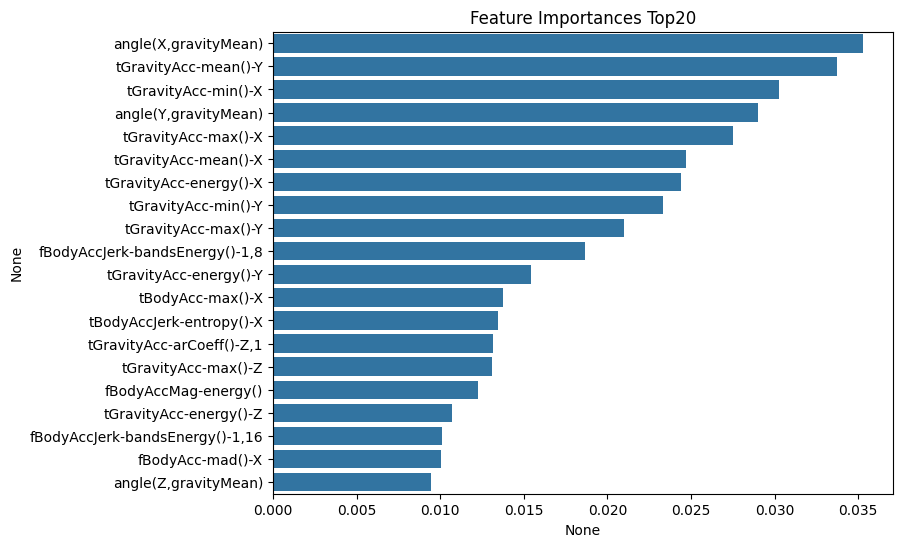

In [ ]:
# DecisionTreeClassifier와 똑같이 feature_importances_ 속성을 이용하여 알고리즘이 선택한 피처의 중요도를 막대 그래프로 시각화.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances Top20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

angle(X,gravityMean), tGravityAcc—mean( )-Y, tGravityAcc-min()-X 등이 높은 피처 중요도를 가지고 있음.

###**04-05. GBM(Gradient Boosting Machine)**

**부스팅 알고리즘**

여러개의 약한 학습기(weak learner)를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식.

**부스팅 알고리즘의 종류**
- AdaBoost(Adaptive Boosting): 개별 약한 학습기가 순차적으로 오류 값에 대해 가중치를 부여한 예측 결정 기준을 모두 결합해 예측을 수행.
   - 아래는 +와 -로 된 피처 데이터 세트를 에이다 부스트로 예측하는 과정을 그림으로 나타낸 것.
   - 첫번째 약한 학습기가 분류 1로 +와 -를 분류한 후, 잘못 분류된 오류 데이터에 대해서 가중치 값을 부여하여 다음 약한 학습기가 더 잘 분류할 수 있도록 크기를 커지게 한다. 그 다음, 두번째 약한 학습기가 분류 기준2로 +와 -를 분류한다. 이 과정을 반복한다. 맨 아래는 첫번째, 두번째, 세번째의 약한 학습기를 모두 결합한 결과 예측. 개별 약한 학습기보다 정확도가 훨씬 높아짐을 알 수 있다.


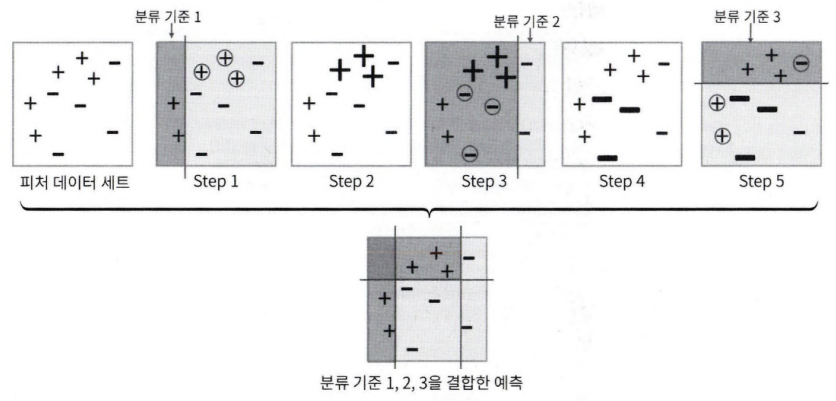

개별 약한 가습기에 각각 가중치를 부여하여 결합한다. 아래는 첫번째 학습기에 가중치 0.3, 두번째 학습기에 가중치 0.5, 세번째 학습기에 가중치 0.8을 부여하여 모두 결합해 예측을 수행하는 것을 그림으로 나타낸 것이다.

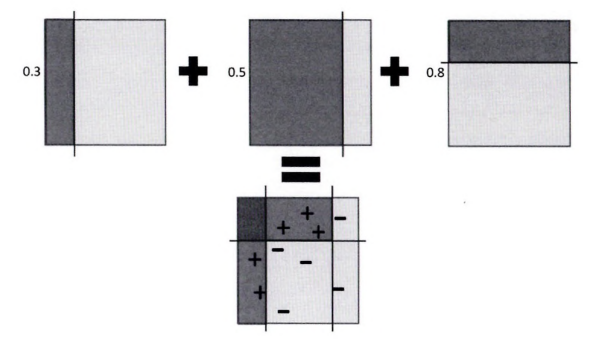

- Gradient Boosting Machine(GBM): 반복 수행을 통해 오류를 최소화할 수 있도록 가중치의 업데이트 값을 도출하는 기법.
   - 경사 하강법(Gradient Descent): 분류의 실제 결괏값을 y, 피처를 x1, x2...xn, 그리고 이 피처에 기반한 예측 함수를 F(x)함수라고 했을 때, 오류식 h(x) = y - F(x)를 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트하는 것.
   - 분류, 회귀 모두 가능.
   - GradientBoostingClassifier
   - 랜덤 포레스트보다는 예측 성능이 조금 뛰어난 경우가 많고 과적합에도 강하지만, 랜덤 포레스트보다 수행 시간이 더 오래 걸리고 하이퍼 파라미터 튜닝 노력도 더 필요함.  

**GBM 하이퍼 파라미터 소개**
- n_estimators, max_depth, max_features와 같은 트리 기반 자체의 파라미터
- loss: 경사하강법에서 사용할 비용함수를 지정. 특별한 이유가 없으면 디폴트인 'deviance' 적용.
- learning_rate: 학습을 진행할 때마다 적용되는 학습률. 기본값은 0.1. 값이 작으면 최소 오류값을 찾아 예측성능이 높아질 가능성이 높음. (너무 작으면 weak learner의 반복이 완료돼도 최소오류값을 찾지 못할 수 있음.) 반대로 큰 값을 적용하면 최소오류값을 찾지 못하고 그냥 지나쳐버려 예측 성능이 떨어질 가능성이 높아지지만, 빠른 수행이 가능.
- n_estimators: 약한 학습기의 개수. 개수가 많을수록 예측 성능이 일정수준까지 좋아질 수 있지만, 개수가 많을수록 수행시간이 오래걸림. 디폴트는 100.
- subsample: 약한 학습기가 학습에 사용하는 데이터의 샘플링 비율. 0.5이면 학습데이터의 50%를 학습한다는 뜻. 디폴트는 1(전체 데이터기반 학습). 과적합이 염려될 경우 1보다 작은 값 적용.




In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도 {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f} 초'.format(time.time() - start_time))

GBM 정확도 0.9386
GBM 수행 시간: 1277.6 초


기본 하이퍼 파라미터만으로 예측 정확도 93.89%로 앞의 랜덤 포레스트보다 나은 예측 성능을 보이지만, 수행 시간 ___초의 오랜 수행 시간이 걸림.

이처럼 사이킷런의 GradientBoostingClassifier는 약한 학습기의 순차적인 예측 오류 보정을 통해 학습을 수행하므로 멀티 CPU 코어 시스템을 사용하더라도 병렬 처리가 지원되지 않아서 대용량 데이터의 경우 학습에 매우 많은 시간이 필요함.  

###**04-06. XGBoost(eXtra Gradient Boost)**

**XGBoost 개요**

- XGBoost는 GBM에 기반, GBM의 단점인 느린 수행 시간 및 과적합 규제 부재 등의 문제를 해결. 특히, 병렬 CPU 환경에서 병렬 학습이 가능하여 기존 GBM보다 빠르게 학습 가능. 아래는 XGBoost의 장점을 정리한 것.


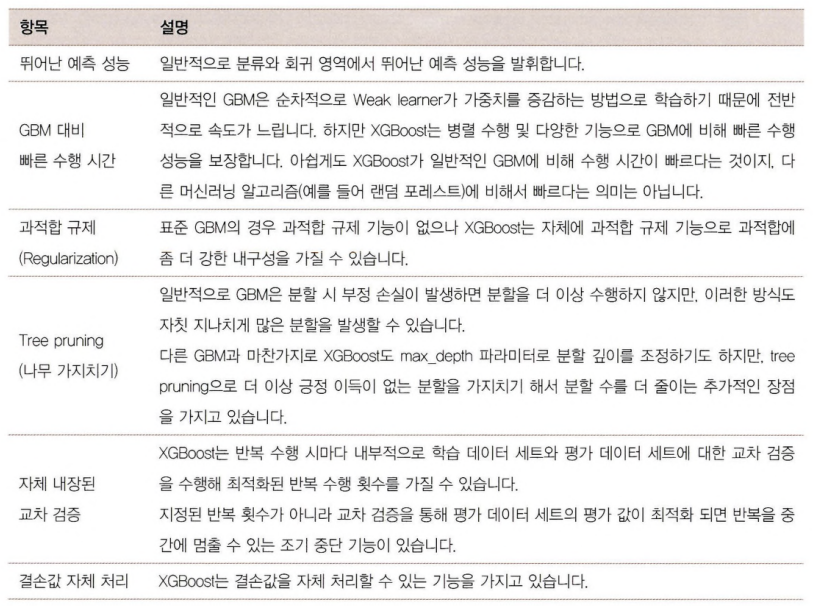

- '사이킷런 래퍼 XGBoost 모듈'은 사이킷런의 다른 Estimator와 사용법이 같은 데 반해 '파이썬 네이티브 XGBoost'는 고유의 API와 하이퍼 파라미터를 이용함을 주의.

**파이썬 래퍼 XGBoost 하이퍼 파라미터**
- 일반 파라미터: 일반적으로 실행 시 스레드의 개수나 silent 모드 등의 선택을 위한 파라미터로서 디폴트 파라미터 값을 바꾸는 경우는 거의 없음.
   - booster, silent, nthread
- 부스터 파라미터: 대부분의 하이퍼 파라미터가 여기에 속함. 트리 최적화, 부스팅, regularization 등과 관련 파라미터 등을 지칭.
   - eta, num_boost_rounds, min_child_weight, gamma, max_depth, sub_sample, colsample_bytree, lambda, alpha, scale_pos_weight

- 학습 태스크 파라미터: 학습 수행 시의 객체 함수, 평가를 위한 지표 등을 설정하는 파라미터.
   - objective, binary:logistic, multi:softmax, multi:softprob, eval_metric (rmse, mae, logloss, error, merror, mlogloss, auc)
- 과적합 문제가 심각하다면,
   - eta값을 낮추고 num_round 값을 높여주거나
   (eta: 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값)
   - max_depth값을 낮추거나
   (max_depth: 보통 3~10의 값)
   - min_child_weight값을 높이거나
   (min_child_weight: 트리에서 추가적으로 가지를 나눌지를 결정하기 위해 필요한 데이터들의 weight 총합, 클수록 분할을 자제.)
   - gamma값을 높이거나
   (gamma: 트리의 리프 누드를 추가적으로 나눌지를 결정할 최소 손실 감소 값. 해당 값보다 큰 손실(loss)이 감소된 경우에 리프 노드를 분리. 값이 클수록 과적합 감소.)
   - subsample과 colsample_bytree를 조정하여 트리가 너무 복잡하게 생성되는 것을 막을 수 있다. (subsample: 데이터를 샘플링하는 비율. 일반적으로 0.5~1 사이의 값. / colsample_bytree: 트리 생성에 필요한 피처(칼럼)를 임의로 샘플링하는 데에 사용됨.)
- Early Stopping 기능을 이용하여 n_estimators에 지정한 부스팅 반복 횟수에 도달하지 않더라도 예측 오류가 더 이상 개선되지 않으면 반복을 끝까지 수행하지 않고 중지해서 수행 시간을 개선할 수 있음. 기본 GBM과의 차이점.

**파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측**

위스콘신 유방암 데이터 세트는 종양의 크기, 모양 등 다양한 속상값을 기반으로 악성 종양인지 양성 종양인지 분류한 데이터 세트다. 이에 기반해 다양한 피처에 따라 악성종양인지 양성종양인지 XGBoost를 이용해 예측해보자.
- xgboost 패키지는 피처의 중요도를 시각화해주는 모듈인 plot_importance를 함께 제공.
   - plot_importance(xgb_model, ax=ax)
   - 단, xgboost를 DataFrame이 아닌 넘파이 기반의 피처 데이터로 학습시에는 **plot_importance( )**를 이용하였을 때 y축의 피처명을 f0, f1처럼 피처 순서별로 나타냄.
- 파이썬 래퍼 XGBoost는 사이킷런의 GridSearchCV와 유사하게 데이터 세트에 대한 교차검증 수행 후 최적 파라미터를 구할 수 있는 방법을 API인 **cv( )**로 제공.
   
   xgboost.cv(params, dtrain, num_boost_round=10, nfold=3, stratified=False, folds=None, metrics=(),obj=None, feval=None, maximize=False, early_stopping_rounds=None, fpreproc=None, as_pandas=True, verbose_eval=None, show_stdv=True, seed=0, callbacks=None, shuffle=True)
   - params(dict): 부스터 파라미터
   - dtrain(DMatrix): 학습 데이터
   - num_boost_round(int): 부스팅 반복 횟수
   - nfold(int): CV 폴드 개수
   - stratified(bool): CV 수행시 충화 표본 추출(stratified sampling) 수행 여부
   - metrics(string or list of strings): CV 수행시 모니터링할 성능 평가 지표
   - early_stopping_rounds(int): 조기중단을 활성화시킴. 반복 횟수 지정.
   - xgb.cv의 반환값은 DataFrame 형태.
   



In [ ]:
import xgboost as xgb
print(xgb.__version__)

2.1.1


In [ ]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target

cancer_df = pd.DataFrame(data=features, columns=dataset.feature_names)
cancer_df['target'] = labels
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [ ]:
# 레이블 값의 종류는 악성 'malignant'가 0값, 양성 'benign'이 1값임.
# 레이블의 값의 분포 확인하기.
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


In [ ]:
# cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
# 맨 마지막 칼럼이 Label임. Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1 슬라이싱으로 추출.
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습, 10%는 검증용 데이터로 분리.
# XGBoost 제공기능인 검증 성능 평가와 조기 중단을 수행해보기 위함.
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)

# 전체 569개 데이터 중 최종 학습용 409개, 검증용 46개, 테스트용 114개.

(455, 30) (114, 30)
(409, 30) (46, 30)


In [ ]:
# 만약 구버전 XGBoost에서 DataFrame으로 DMatrix 생성이 안될 경우 X_train.value로 넘파이 변환.
# 학습, 검증, 테스트용 DMatrix 생성.
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

max_depth(트리 최대 깊이)는 3,

학습률 eta는 0.1,

예제 데이터가 0 또는 1인 이진분류이므로 목적함수(objective)는 이진로지스틱(binary logistic),

오류 함수의 평가 성능 지표는 logloss,

num_rounds(부스팅 반복 횟수)는 400회가 되도록 XGBoost의 하이퍼 파라미터를 딕셔너리 형태로 입력.


In [ ]:
# XGBoost의 하이퍼 파라미터를 딕셔너리 형태로 입력.
params = {'max_depth':3,
          'eta':0.05,
          'objective':'binary:logistic',
          'eval_metric':'logloss'
}

num_rounds = 400

In [ ]:
# 학습 데이터 세트는 'train' 또는 평가 데이터 세트는 'eval'로 명기함.
eval_list = [(dtr, 'train'), (dval, 'eval')]   # 또는 eval_list = [(dval, 'eval')]처럼 평가 데이터 세트만 설정해도 무방.

# 하이퍼 파라미터와 early stopping 파라미터를 train()함수의 파라미터로 전달
# train()은 학습이 완료된 모델 객체를 반환.
xgb_model = xgb.train(params=params, dtrain=dtr, num_boost_round=num_rounds, early_stopping_rounds=50, evals=eval_list)

[0]	train-logloss:0.62480	eval-logloss:0.63104
[1]	train-logloss:0.58674	eval-logloss:0.60478
[2]	train-logloss:0.55226	eval-logloss:0.58223
[3]	train-logloss:0.52086	eval-logloss:0.56184
[4]	train-logloss:0.49192	eval-logloss:0.54118
[5]	train-logloss:0.46537	eval-logloss:0.52223
[6]	train-logloss:0.44029	eval-logloss:0.50287
[7]	train-logloss:0.41666	eval-logloss:0.48620
[8]	train-logloss:0.39525	eval-logloss:0.46974
[9]	train-logloss:0.37542	eval-logloss:0.45497
[10]	train-logloss:0.35701	eval-logloss:0.44131
[11]	train-logloss:0.33982	eval-logloss:0.43134
[12]	train-logloss:0.32297	eval-logloss:0.41972
[13]	train-logloss:0.30725	eval-logloss:0.40902
[14]	train-logloss:0.29327	eval-logloss:0.39883
[15]	train-logloss:0.27946	eval-logloss:0.38968
[16]	train-logloss:0.26691	eval-logloss:0.38150
[17]	train-logloss:0.25473	eval-logloss:0.37368
[18]	train-logloss:0.24385	eval-logloss:0.36666
[19]	train-logloss:0.23338	eval-logloss:0.35994
[20]	train-logloss:0.22320	eval-logloss:0.35374
[2

학습을 수행하면서 반복 시마다 train-logloss와 eval-logloss가 지속적으로 감소하고 있지만, num_boost_round가 400회로 설정되어있음에도 불구하고 0부터 시작하여 250번째 반복에서 학습을 완료함.

위에 결과를 보면, 201번째 반복에서 검증 데이터에 대한 logloss값인 eval-logloss값이 0.23533로 제일 낮은데, 이 이후 early_stopping_rounds로 설정된 50회 동안 향상되지 않았기 때문에 더 이상 반복하지 않고 멈춘 것임.

xgboost를 이용해 모델의 학습이 완료되었으니 테스트 데이터 세트에 대해 예측을 수행해보자. 한가지 유의점은, 사이킷런의 predict() 메서드는 예측결과 클래스값(0,1)을 반환하는데에 반해 파이썬의 xgboost의 predict() 메서드는 예측 결과를 추정할 수 있는 확률값을 반환한다는 것.

In [ ]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정하여 list 객체인 preds에 저장.
preds = [ 1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])

predict() 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨
[0.938 0.004 0.75  0.049 0.98  1.    0.999 0.999 0.998 0.001]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
# XGBoost 모델의 예측 성능 평가.
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[35  2]
 [ 2 75]]
정확도: 0.9649, 정밀도: 0.9740, 재현율: 0.9740, F1: 0.9740, AUC:0.9965


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

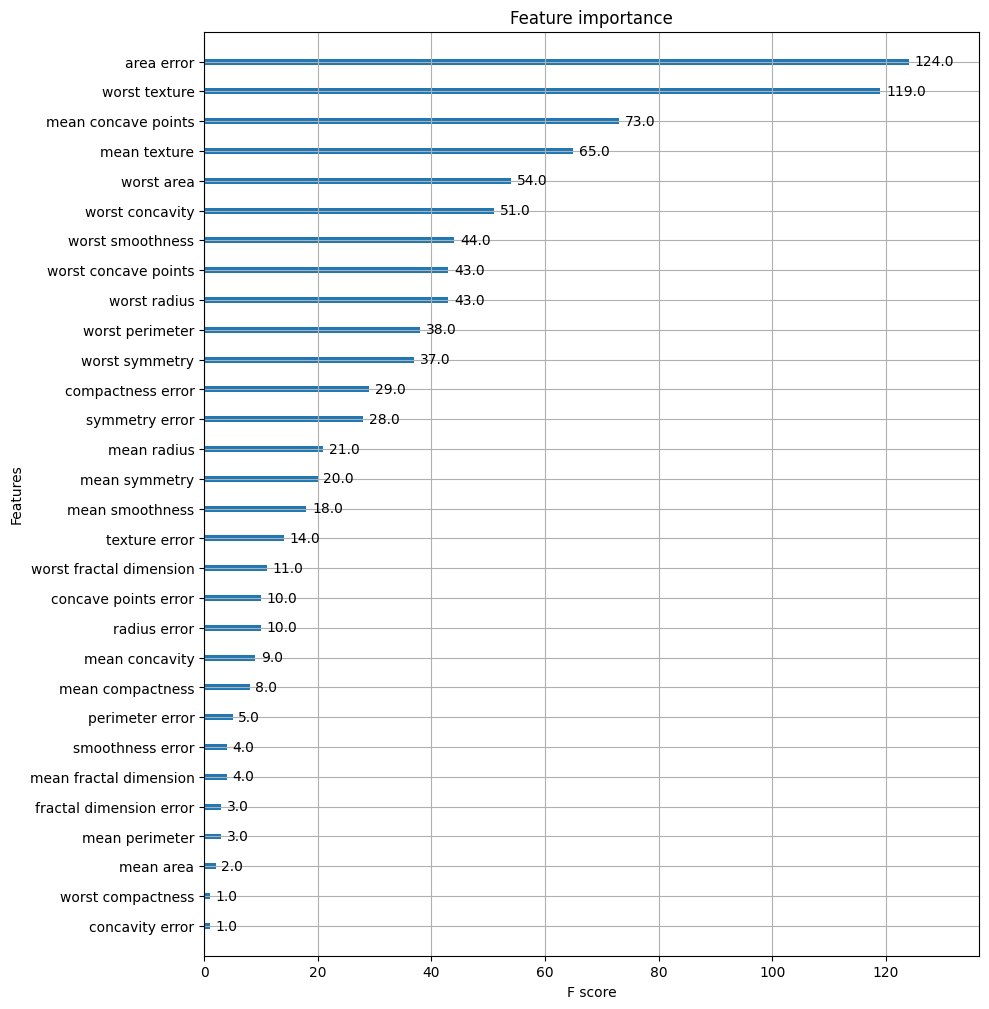

In [ ]:
# xgboost의 plot_importance() API를 이용해서 피처 중요도를 막대그래프 형식으로 나타내기.
# plot_importance()는 해당 피처가 트리 분할 시 얼마나 자주 사용되었는지 나타낸 값인 f스코어 기반.
# plot_importance() 파라미터로 앞에서 학습이 완료된 모델 객체, 맷플롯립의 ax 객체를 입력해주기.
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

**사이킷런 래퍼 XGBoost의 개요 및 적용**
- 사이킷런의 프레임워크와 연동하기 위해 사이킷런 전용의 XGBoost 래퍼 클래스가 개발됨.
- 사이킷런의 기본 Estimator를 그대로 상속해왔기 때문에 fit()와 predict()만으로 학습과 예측이 가능함. 기존의 다른 머신러닝 알고리즘으로 만들어놓은 프로그램 그대로 이용 가능.
- 분류를 위한 래퍼 클래스 XGBClassifier, 회귀를 위한 래퍼 클래스 XGBRegressor.
- 파이썬 래퍼 XGBoost의 하이퍼 파라미터와의 차이점:
   - 파이썬: eta / sub_sample / lambda / alpha
   - 사이킷런: learning_rate / subsample / reg_lambda / reg_alpha
   - n_estimators와 num_boost_round 파라미터가 동시에 사용될 경우, 파이썬에선 num_boost_round 파라미터가, 사이킷런에선 n_estimator 파라미터가 적용됨.


In [ ]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트.
from xgboost import XGBClassifier

# Warning 메시지를 없애기 위해 eval_metrics 값을 XGBClassifier 생성 인자로 입력.
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, eval_metric='logloss')
xgb_wrapper.fit(X_train.values, y_train.values, verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

In [ ]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870, F1: 0.9806, AUC:0.9954


앞의 파이썬 래퍼 XGBoost를 이용했을 때보다 더 좋은 평가 결과가 나옴. 그 이유는 위스콘신 데이터 세트가 작은데 조기 중단을 위해서 학습 데이터를 다시 X_tr과 X_val로 분리하면서 최종 학습 데이터 건수가 작아져서 검증 데이터를 분리하거나 교차검증을 적용할 때 성능 수치가 불안정한 것으로 추정됨.

In [ ]:
# 사이킷런 래퍼 XGBoost에서 조기중단 수행해보기. 파라미터를 fit()에 입력.
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, early_stopping_rounds=50, eval_metric='logloss')
evals=[(X_tr, y_tr),(X_val,y_val)]
xgb_wrapper.fit(X_tr, y_tr, eval_set=evals, verbose=True)

ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.62480	validation_1-logloss:0.63104
[1]	validation_0-logloss:0.58674	validation_1-logloss:0.60478
[2]	validation_0-logloss:0.55226	validation_1-logloss:0.58223
[3]	validation_0-logloss:0.52086	validation_1-logloss:0.56184
[4]	validation_0-logloss:0.49192	validation_1-logloss:0.54118
[5]	validation_0-logloss:0.46537	validation_1-logloss:0.52223
[6]	validation_0-logloss:0.44029	validation_1-logloss:0.50287
[7]	validation_0-logloss:0.41666	validation_1-logloss:0.48620
[8]	validation_0-logloss:0.39525	validation_1-logloss:0.46974
[9]	validation_0-logloss:0.37542	validation_1-logloss:0.45497
[10]	validation_0-logloss:0.35701	validation_1-logloss:0.44131
[11]	validation_0-logloss:0.33982	validation_1-logloss:0.43134
[12]	validation_0-logloss:0.32297	validation_1-logloss:0.41972
[13]	validation_0-logloss:0.30725	validation_1-logloss:0.40902
[14]	validation_0-logloss:0.29327	validation_1-logloss:0.39883
[15]	validation_0-logloss:0.27946	validation_1-logloss:0.38968
[1

파이썬 래퍼와 마찬가지로 250번째 반복에서 학습을 마무리. 역시 201번째 반복에서 validation_1—logloss가 0.23533으로 제일 낮았고, 이후 50번 반복까지 더 이상 성능이 향상되지 않았기 때문에 학습이 조기 종료됨.

In [ ]:
# 조기중단으로 학습된 XGBClassifier의 예측 성능.
# 파이썬 래퍼의 조기 중간 성능과 동일.
get_clf_eval(y_test, ws50_preds, ws50_pred_proba)

오차 행렬
[[35  2]
 [ 2 75]]
정확도: 0.9649, 정밀도: 0.9740, 재현율: 0.9740, F1: 0.9740, AUC:0.9961


In [ ]:
# early_stopping_rounds를 10으로 설정하고 재학습.
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, early_stopping_rounds=10, eval_metric='logloss')
evals=[(X_tr, y_tr),(X_val,y_val)]
xgb_wrapper.fit(X_tr, y_tr, eval_set=evals, verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.62480	validation_1-logloss:0.63104
[1]	validation_0-logloss:0.58674	validation_1-logloss:0.60478
[2]	validation_0-logloss:0.55226	validation_1-logloss:0.58223
[3]	validation_0-logloss:0.52086	validation_1-logloss:0.56184
[4]	validation_0-logloss:0.49192	validation_1-logloss:0.54118
[5]	validation_0-logloss:0.46537	validation_1-logloss:0.52223
[6]	validation_0-logloss:0.44029	validation_1-logloss:0.50287
[7]	validation_0-logloss:0.41666	validation_1-logloss:0.48620
[8]	validation_0-logloss:0.39525	validation_1-logloss:0.46974
[9]	validation_0-logloss:0.37542	validation_1-logloss:0.45497
[10]	validation_0-logloss:0.35701	validation_1-logloss:0.44131
[11]	validation_0-logloss:0.33982	validation_1-logloss:0.43134
[12]	validation_0-logloss:0.32297	validation_1-logloss:0.41972
[13]	validation_0-logloss:0.30725	validation_1-logloss:0.40902
[14]	validation_0-logloss:0.29327	validation_1-logloss:0.39883
[15]	validation_0-logloss:0.27946	validation_1-logloss:0.38968
[1

조기 중단값을 너무 급격하게 줄이면 아직 성능이 향상될 여지가 있음에도 불구하고 반복이 멈춰버려 충분한 학습이 되지 않아 예측 성능이 나빠질 수 있음.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

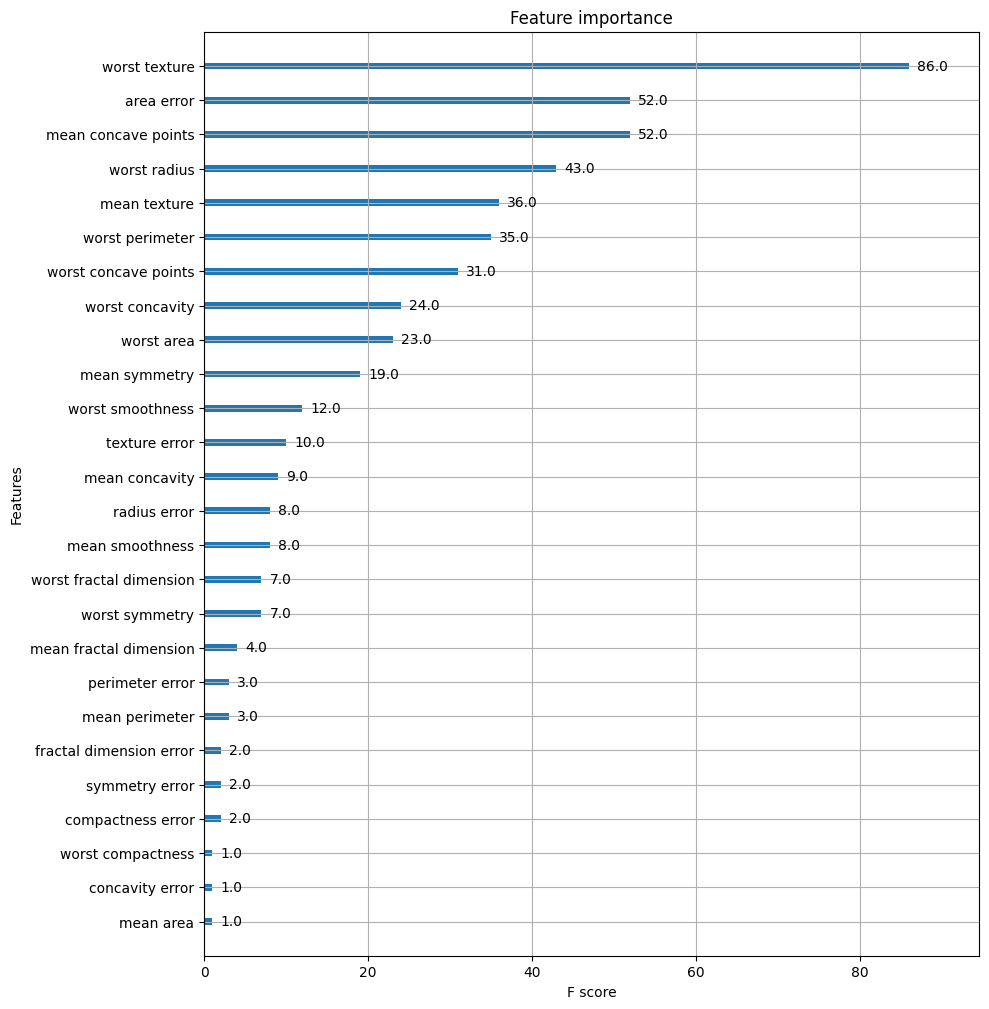

In [ ]:
# 파이썬 래퍼 클래스와 마찬가지로 plot_importance() API에 사이킷런 래퍼 클래스를 입력해서 피처의 중요도 시각화 가능.
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
# 사이킷런 래퍼 클래스를 입력해도 무방.
plot_importance(xgb_wrapper, ax=ax)